# Transfer learning appliqué à la dataset du titanic (Classification binaire)

## Importer les données train et test du titanic

In [1]:
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(889, 10)
(417, 10)
(889, 1)
(417, 1)


## Importer l'architecture du modèle et les poids

In [2]:
from keras.models import model_from_json

# Charger le fichier json and créer le modèle
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# Charger les poids du modèle
loaded_model.load_weights("model.h5")
print("Le modèle et les poids sont chargés")

Using TensorFlow backend.


Le modèle et les poids sont chargés


## Transformer la dernière couche en couche modifiable

In [3]:
from keras.layers import Input
from keras.optimizers import Adam

print(len(loaded_model.layers))

freezing_layers = 2
for i in range(0,freezing_layers):
    loaded_model.layers[i].trainable = False
adam = Adam(lr=0.001)
loaded_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

6


In [4]:
# Entrainer le modèle
history = loaded_model.fit(X_train, y_train, validation_split=0.20, batch_size=50, epochs=100)

Train on 711 samples, validate on 178 samples
Epoch 1/100
711/711 [==============================] - 0s 596us/step - loss: 0.6250 - acc: 0.6906 - val_loss: 0.5828 - val_acc: 0.7809
Epoch 2/100
711/711 [==============================] - 0s 76us/step - loss: 0.6119 - acc: 0.6990 - val_loss: 0.5598 - val_acc: 0.8202
Epoch 3/100
711/711 [==============================] - 0s 61us/step - loss: 0.5891 - acc: 0.7173 - val_loss: 0.5344 - val_acc: 0.8146
Epoch 4/100
711/711 [==============================] - 0s 60us/step - loss: 0.5704 - acc: 0.7454 - val_loss: 0.5105 - val_acc: 0.8090
Epoch 5/100
711/711 [==============================] - 0s 48us/step - loss: 0.5570 - acc: 0.7243 - val_loss: 0.4872 - val_acc: 0.8202
Epoch 6/100
711/711 [==============================] - 0s 55us/step - loss: 0.5455 - acc: 0.7426 - val_loss: 0.4734 - val_acc: 0.8202
Epoch 7/100
711/711 [==============================] - 0s 47us/step - loss: 0.5413 - acc: 0.7511 - val_loss: 0.4610 - val_acc: 0.8090
Epoch 8/100
711

711/711 [==============================] - 0s 89us/step - loss: 0.4625 - acc: 0.7975 - val_loss: 0.4093 - val_acc: 0.8371
Epoch 62/100
711/711 [==============================] - 0s 64us/step - loss: 0.4826 - acc: 0.7848 - val_loss: 0.4075 - val_acc: 0.8258
Epoch 63/100
711/711 [==============================] - 0s 49us/step - loss: 0.4779 - acc: 0.7820 - val_loss: 0.4071 - val_acc: 0.8315
Epoch 64/100
711/711 [==============================] - 0s 52us/step - loss: 0.4863 - acc: 0.7876 - val_loss: 0.4076 - val_acc: 0.8315
Epoch 65/100
711/711 [==============================] - 0s 49us/step - loss: 0.4675 - acc: 0.7820 - val_loss: 0.4080 - val_acc: 0.8258
Epoch 66/100
711/711 [==============================] - 0s 41us/step - loss: 0.4776 - acc: 0.7764 - val_loss: 0.4077 - val_acc: 0.8258
Epoch 67/100
711/711 [==============================] - 0s 64us/step - loss: 0.4764 - acc: 0.7947 - val_loss: 0.4094 - val_acc: 0.8258
Epoch 68/100
711/711 [==============================] - 0s 51us/step

In [5]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                352       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                660       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,365
Trainable params: 1,013
Non-trainable params: 352
_________________________________________________________________


In [6]:
loaded_model.evaluate(X_test, y_test) # fonction d'erreur (binary cross entropy) + Accuracy

417/417 [==============================] - 0s 75us/step


[0.26365981392151444, 0.9616306954436451]

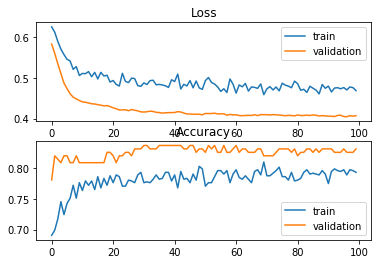

In [9]:
from matplotlib import pyplot

# Tracer la courbe d'erreur pendant l'apprentissage
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
# Tracer la courbe de la précision pendant l'apprentissage
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='validation')
pyplot.legend()
pyplot.show()

In [8]:
from sklearn.metrics import confusion_matrix

# La matrice de confusion
print("La matrice de confusion:\n {}".format(confusion_matrix(y_test, loaded_model.predict_classes(X_test))))

La matrice de confusion:
 [[265   0]
 [ 16 136]]
